In [2]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
# Access/Initiate Database
db = client['test_database']
# Access/Initiate Table
tab = db['test_table']

In [107]:
import warnings

from pymongo import MongoClient
import pprint
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.patches as mpatches
# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

In [4]:
krysstal_url = 'http://www.krysstal.com/league.html#league_champions'

In [5]:
r = requests.get(krysstal_url)
r.status_code

200

In [6]:
db = client.metroid
pages = db.pages

pages.insert_one({'html': r.content})

In [7]:
soup = BeautifulSoup(r.content, "html")

In [8]:
body = soup.find('body')
center = body.find_all('center')[2]
table = center.find('table')

rows = table.find_all('tr')

all_rows = []

empty_row = {
    'Season':None, "Club":None, "Number of Wins":None
}

for row in rows[1:48]:
    new_row = copy.copy(empty_row)
    # A list of all the entries in the row.
    columns = row.find_all("td")
    new_row['Season'] = int(columns[0].text.strip())
    new_row['Club'] = columns[1].text.strip()
    new_row['Number of Wins'] = int(columns[2].text.strip())
    all_rows.append(new_row)

In [9]:
for row in rows[49:]:
    new_row = copy.copy(empty_row)
    # A list of all the entries in the row.
    columns = row.find_all("td")
    new_row['Season'] = int(columns[0].text.strip())
    new_row['Club'] = columns[1].text.strip()
    new_row['Number of Wins'] = int(columns[2].text.strip())
    all_rows.append(new_row)

In [10]:
pprint.pprint(all_rows)

[{'Club': 'Preston North End', 'Number of Wins': 1, 'Season': 1889},
 {'Club': 'Preston North End', 'Number of Wins': 2, 'Season': 1890},
 {'Club': 'Everton', 'Number of Wins': 1, 'Season': 1891},
 {'Club': 'Sunderland', 'Number of Wins': 1, 'Season': 1892},
 {'Club': 'Sunderland', 'Number of Wins': 2, 'Season': 1893},
 {'Club': 'Aston Villa', 'Number of Wins': 1, 'Season': 1894},
 {'Club': 'Sunderland', 'Number of Wins': 3, 'Season': 1895},
 {'Club': 'Aston Villa', 'Number of Wins': 2, 'Season': 1896},
 {'Club': 'Aston Villa', 'Number of Wins': 3, 'Season': 1897},
 {'Club': 'Sheffield United', 'Number of Wins': 1, 'Season': 1898},
 {'Club': 'Aston Villa', 'Number of Wins': 4, 'Season': 1899},
 {'Club': 'Aston Villa', 'Number of Wins': 5, 'Season': 1900},
 {'Club': 'Liverpool', 'Number of Wins': 1, 'Season': 1901},
 {'Club': 'Sunderland', 'Number of Wins': 4, 'Season': 1902},
 {'Club': '(Sheffield) Wednesday', 'Number of Wins': 1, 'Season': 1903},
 {'Club': '(Sheffield) Wednesday', 'Nu

In [11]:
db = client.metroid
champs = db.champs
for row in all_rows:
    champs.insert_one(row)

In [12]:
rows = champs.find()
pl_champs = pd.DataFrame(list(rows))
pl_champs

,_id,Season,Club,Number of Wins
0,5e13935132aeed0cb4d14fdb,1889,Preston North End,1
1,5e13935132aeed0cb4d14fdc,1890,Preston North End,2
2,5e13935132aeed0cb4d14fdd,1891,Everton,1
3,5e13935132aeed0cb4d14fde,1892,Sunderland,1
4,5e13935132aeed0cb4d14fdf,1893,Sunderland,2
...,...,...,...,...
355,5e150cc89a47e033d591a830,2015,Chelsea,5
356,5e150cc89a47e033d591a831,2016,Leicester City,1
357,5e150cc89a47e033d591a832,2017,Chelsea,6
358,5e150cc89a47e033d591a833,2018,Manchester City,5


In [13]:
pl_champs
clubs = pl_champs.Club.unique()
clubs

array(['Preston North End', 'Everton', 'Sunderland', 'Aston Villa',
       'Sheffield United', 'Liverpool', '(Sheffield) Wednesday',
       'Newcastle United', 'Manchester United', 'Blackburn Rovers',
       'West Bromwich Albion', 'Burnley', 'Huddersfield Town',
       'Sheffield Wednesday', 'Arsenal', 'Manchester City', 'Portsmouth',
       'Tottenham Hotspur', 'Wolverhampton Wanderers', 'Chelsea',
       'Ipswich Town', 'Leeds United', 'Derby County',
       'Nottingham Forest', 'Leicester City'], dtype=object)

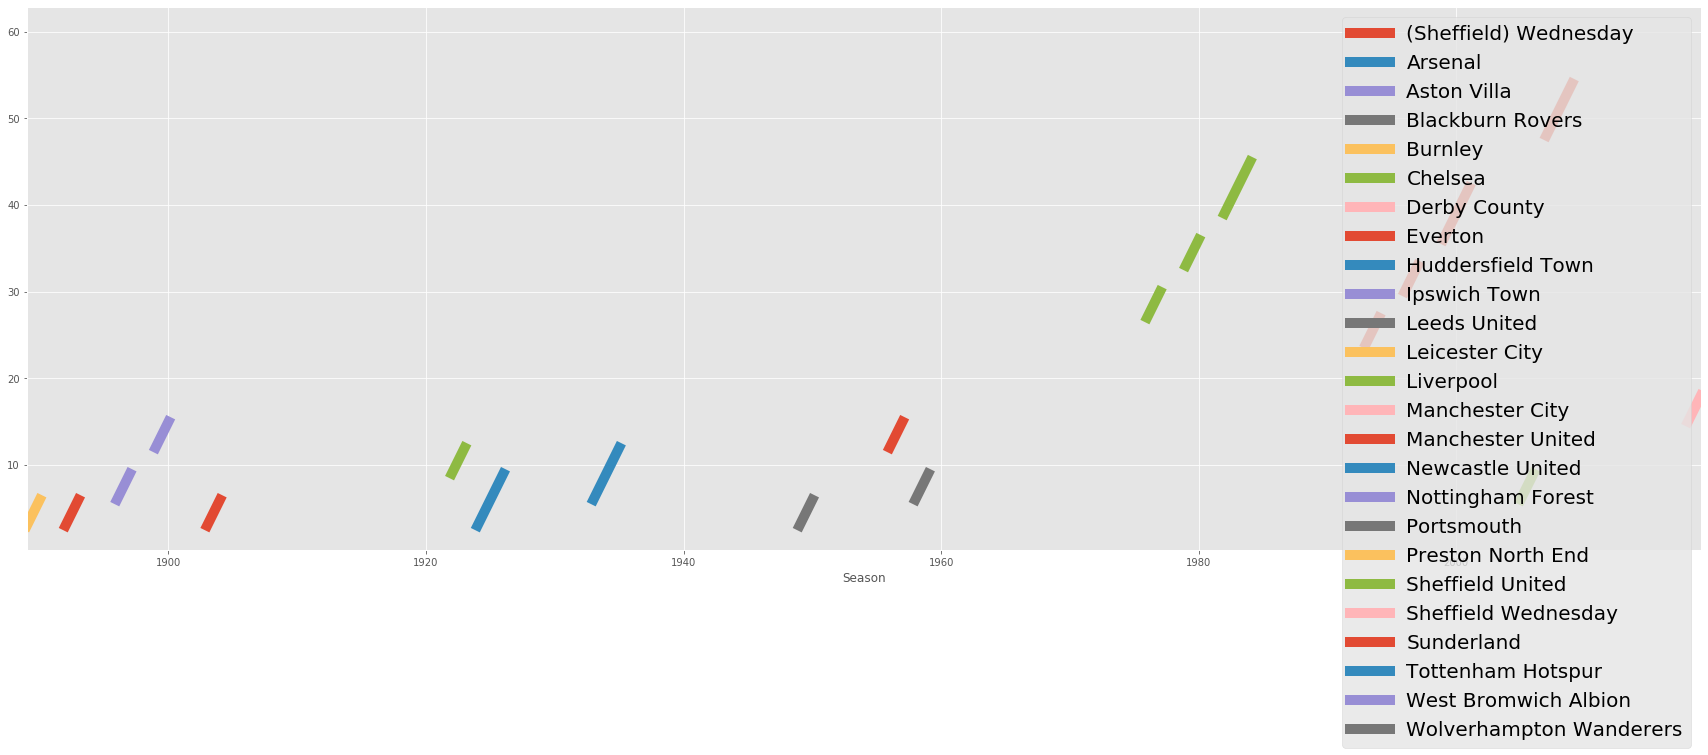

In [14]:
fig,ax = plt.subplots(figsize=[30,10])
pl_champs.groupby(["Season","Club"]).sum()['Number of Wins'].unstack().plot(ax=ax, linewidth=10)
ax.legend(prop={'size': 20})

In [15]:
df = pl_champs.groupby(["Season","Club"]).apply(lambda x: x["Number of Wins"].sum()/len(x)).unstack()
df

Club,(Sheffield) Wednesday,Arsenal,Aston Villa,Blackburn Rovers,Burnley,Chelsea,Derby County,Everton,Huddersfield Town,Ipswich Town,...,Newcastle United,Nottingham Forest,Portsmouth,Preston North End,Sheffield United,Sheffield Wednesday,Sunderland,Tottenham Hotspur,West Bromwich Albion,Wolverhampton Wanderers
Season,,,,,,,,,,,,,,,,,,,,,
1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


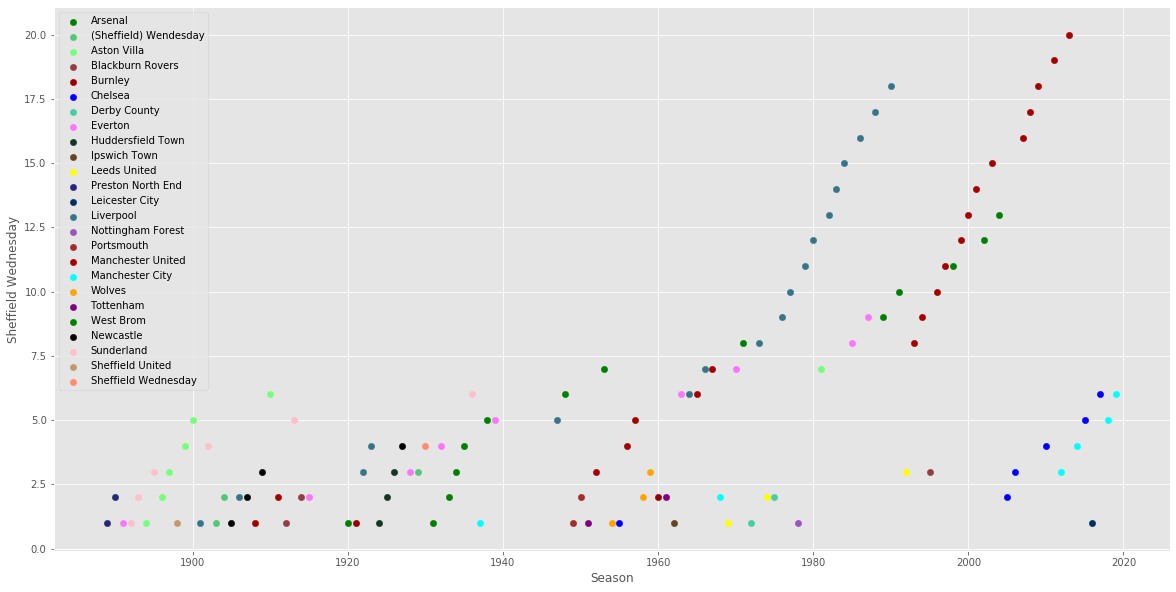

In [16]:
fig,ax = plt.subplots(figsize=[20,10])


df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Arsenal', c='green' , s=40, label = 'Arsenal')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='(Sheffield) Wednesday', c='#50c878',s=40, label = '(Sheffield) Wendesday')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Aston Villa', c='#76ff7a', s=40, label = 'Aston Villa')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Blackburn Rovers', c= '#933d41', s=40, label = 'Blackburn Rovers')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Burnley', c= '#990000', s=40,label='Burnley')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Chelsea', c= 'blue', s=40,label='Chelsea')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Derby County', c= '#45cea2', s=40,label='Derby County')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Everton', c= '#fc74fd', s=40,label='Everton')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Huddersfield Town', c= '#123524', s=40,label='Huddersfield Town')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Ipswich Town', c= '#654321', s=40,label='Ipswich Town')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Leeds United', c='yellow',s=40, label='Leeds United')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Preston North End', c='#23297a', s=40,label='Preston North End')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Leicester City', c= '#002e63', s=40,label='Leicester City')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Liverpool', c= '#367588', s=40, label ='Liverpool')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Nottingham Forest', c= '#9955bb', s=40,label='Nottingham Forest')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Portsmouth', c= 'brown', s=40,label='Portsmouth')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Manchester United', c= '#a40000', s=40,label='Manchester United')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Manchester City', c= '#00ffff', s=40,label='Manchester City')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Wolverhampton Wanderers', c= 'orange', s=40,label='Wolves')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Tottenham Hotspur', c= 'purple', s=40,label='Tottenham')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='West Bromwich Albion', c='green',s=40,label ='West Brom')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Newcastle United', c='black', s=40,label='Newcastle')
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Sunderland', c= 'pink', s=40, label="Sunderland")
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Sheffield United', c= '#c19a6b', s=40, label="Sheffield United")
df.reset_index().plot(ax=ax, kind='scatter', x='Season', y='Sheffield Wednesday', c= '#ff8c69', s=40,label='Sheffield Wednesday')
ax.legend()

In [17]:
new_df = df.fillna(method='ffill') + (df.fillna(method='bfill') * 0)
new_df = new_df.mask(new_df.ffill().isnull(), 0)
new_df

Club,(Sheffield) Wednesday,Arsenal,Aston Villa,Blackburn Rovers,Burnley,Chelsea,Derby County,Everton,Huddersfield Town,Ipswich Town,...,Newcastle United,Nottingham Forest,Portsmouth,Preston North End,Sheffield United,Sheffield Wednesday,Sunderland,Tottenham Hotspur,West Bromwich Albion,Wolverhampton Wanderers
Season,,,,,,,,,,,,,,,,,,,,,
1889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0
1893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


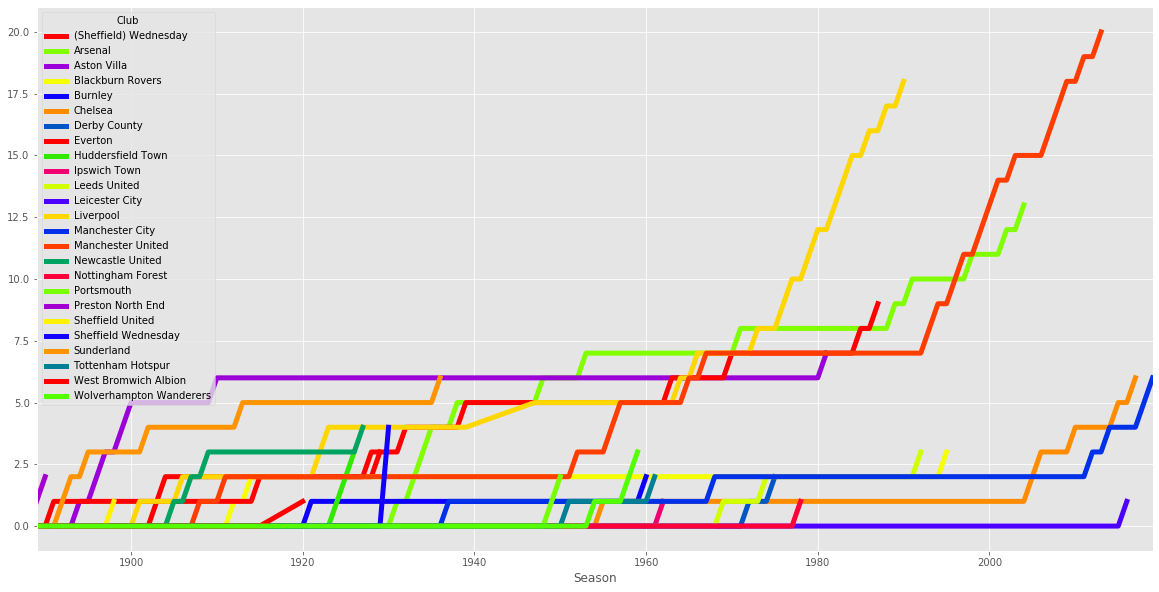

In [19]:
fig,ax = plt.subplots(figsize=[20,10])
new_df.plot(ax=ax,linewidth=5,cmap='prism')

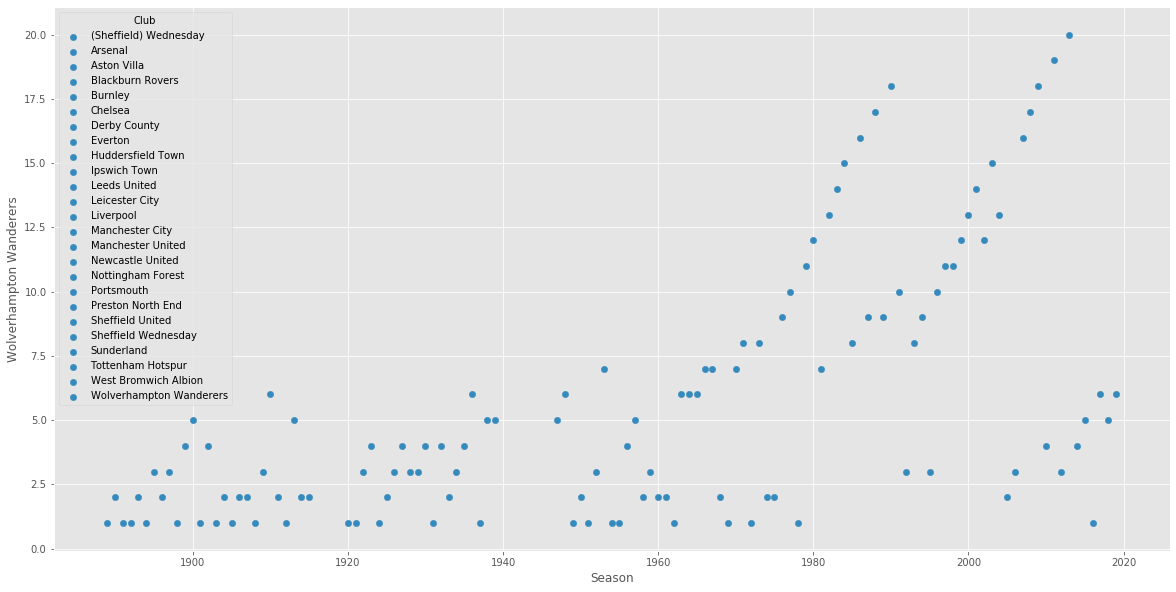

In [20]:
fig,ax = plt.subplots(figsize=[20,10])


    
for i in df:
    df.reset_index().plot(ax=ax, kind='scatter', x='Season', y=i, s=40, label = i)
    


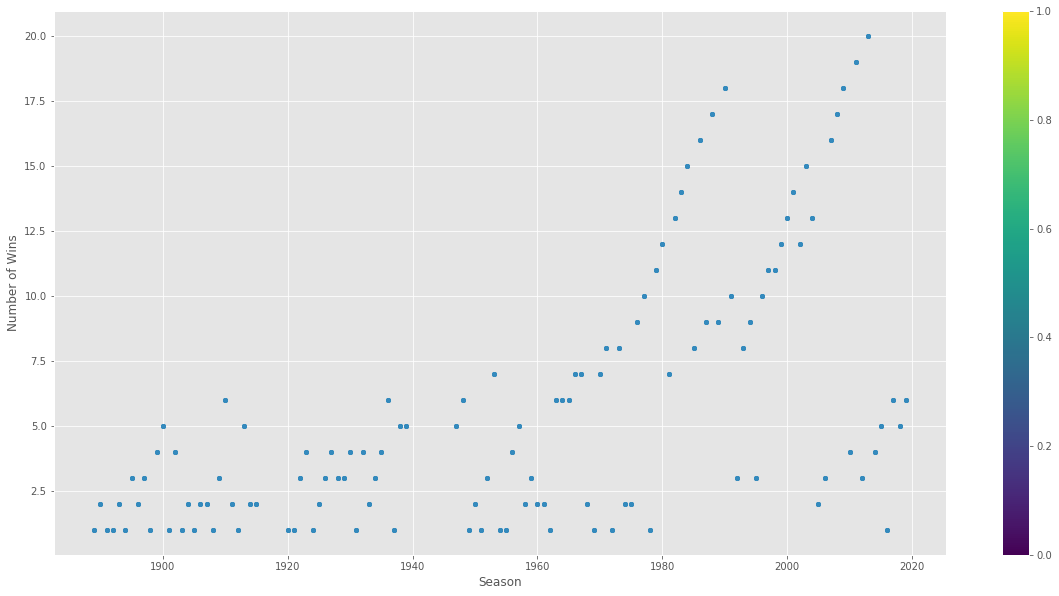

In [21]:
fig,ax = plt.subplots(figsize=[20,10])
pl_champs.plot.scatter(ax = ax, x = 'Season', y = 'Number of Wins', cmap = 'prism')

Club,(Sheffield) Wednesday,Arsenal,Aston Villa,Blackburn Rovers,Burnley,Chelsea,Derby County,Everton,Huddersfield Town,Ipswich Town,...,Newcastle United,Nottingham Forest,Portsmouth,Preston North End,Sheffield United,Sheffield Wednesday,Sunderland,Tottenham Hotspur,West Bromwich Albion,Wolverhampton Wanderers
Season,,,,,,,,,,,,,,,,,,,,,
1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
pl_champs

,Season,Club,Number of Wins
0,1889,Preston North End,1
1,1890,Preston North End,2
2,1891,Everton,1
3,1892,Sunderland,1
4,1893,Sunderland,2
...,...,...,...
355,2015,Chelsea,5
356,2016,Leicester City,1
357,2017,Chelsea,6
358,2018,Manchester City,5


In [61]:
sorted_wins = pl_champs.groupby('Club').max().sort_values("Number of Wins")
sorted_wins

,Season,Number of Wins
Club,,
Sheffield United,1898,1
Nottingham Forest,1978,1
West Bromwich Albion,1920,1
Ipswich Town,1962,1
Leicester City,2016,1
Tottenham Hotspur,1961,2
Preston North End,1890,2
Burnley,1960,2
Portsmouth,1950,2


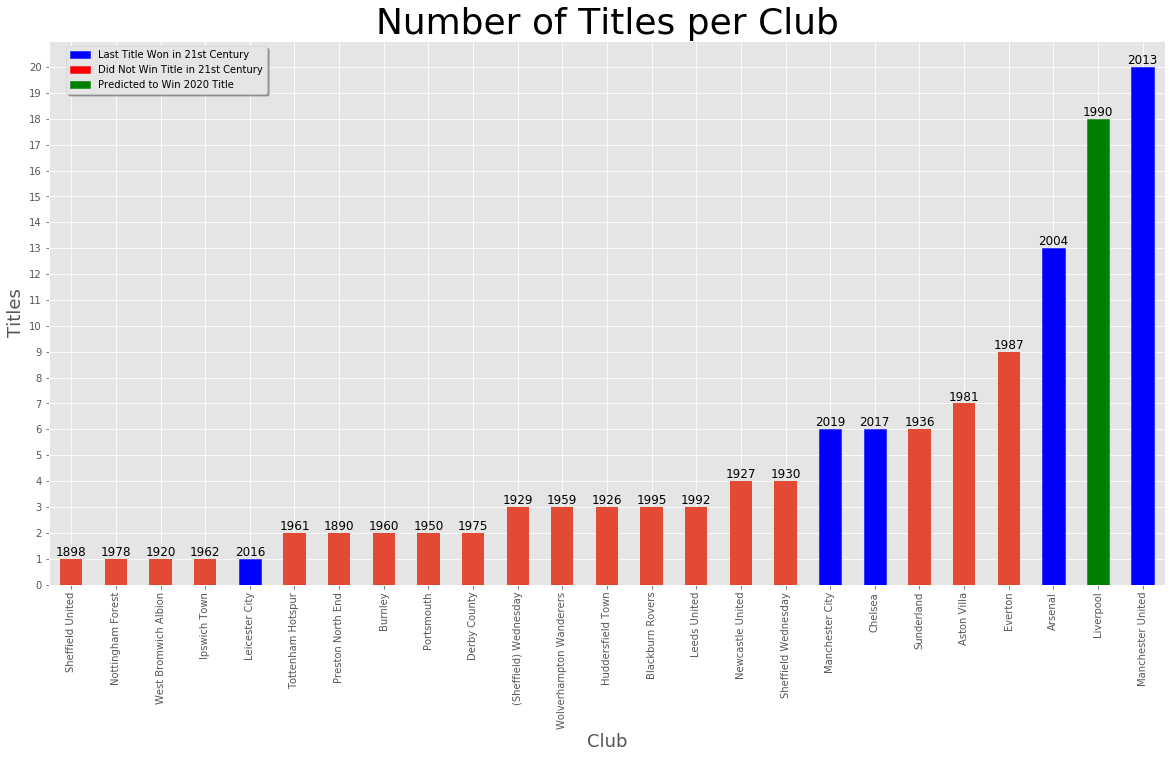

In [139]:
fig, ax = plt.subplots(figsize = [20,10])
sorted_wins.plot(ax = ax, y='Number of Wins', kind='bar')
ax.set_title('Number of Titles per Club', fontsize = 36)
ax.set_ylabel('Titles')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
rects = ax.patches
labels= [1898, 1978, 1920, 1962, 2016, 1961, 1890, 1960, 1950, 1975, 1929,
       1959, 1926, 1995, 1992, 1927, 1930, 2019, 2017, 1936, 1981, 1987,
       2004, 1990, 2013]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom', fontsize = 12)
    
plt.yticks(np.arange(0, 20+1, 1.0))

rects[-3].set_color('b')
rects[-1].set_color('b')
rects[-7].set_color('b')
rects[-8].set_color('b')
rects[4].set_color('b')
rects[-2].set_color('g')

ax.set_xlabel('Club', fontsize = 18)
ax.set_ylabel('Titles', fontsize =18)

blue = mpatches.Patch(color='blue', label='Last Title Won in 21st Century')
red = mpatches.Patch(color='red', label='Did Not Win Title in 21st Century')
green = mpatches.Patch(color='green', label='Predicted to Win 2020 Title')
ax.legend(handles=[blue, red, green], bbox_to_anchor=(.20, 1.00), shadow=True, ncol=1)
plt.show()